In [69]:
%matplotlib inline
import scipy.sparse as ssp
from sklearn.feature_extraction.text import TfidfTransformer
import seaborn
import functions as fnc
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
coll = fnc.init_db('jobs', 'MSq_salaries')

In [9]:
data = coll.find_one()

In [11]:
df = pd.DataFrame(data, index=[0])

In [12]:
df['sal'] = df['sal'].map(lambda x: x.replace('$', '').replace('k', '')).astype(int)

df['date'] = df['other'].map(lambda x: fnc.get_date(x))

df['state'] = df['other'].map(lambda x: fnc.get_state(x))

df['city'] = df['other'].map(lambda x: fnc.get_city(x))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 11 columns):
_id        1 non-null object
company    1 non-null object
desc       1 non-null object
html       1 non-null object
other      1 non-null object
sal        1 non-null int64
title      1 non-null object
url        1 non-null object
date       1 non-null object
state      1 non-null object
city       1 non-null object
dtypes: int64(1), object(10)
memory usage: 96.0+ bytes


In [14]:
data_all = coll.find()

df_all = pd.DataFrame(list(data_all))

df_all['sal'] = df_all['sal'].map(lambda x: x.replace('$', '').replace('k', '')).astype(int)

df_all['date'] = df_all['other'].map(lambda x: fnc.get_date(x))

df_all['state'] = df_all['other'].map(lambda x: fnc.get_state(x))

df_all['city'] = df_all['other'].map(lambda x: fnc.get_city(x))

In [16]:
df_all.head()

,_id,company,desc,html,other,sal,title,url,date,state,city
0,55f81ee9a7ca94263b34990f,Microsoft,"\n It's a new day in IT. There are more apps, ...","\n\n\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD...","Redmond, WA (09/2014)salary of the position in...",124,Software Engineer,http://www.simplyhired.com/a/job-details/view/...,09/2014,WA,Redmond
1,55f81eeba7ca94263b349910,Microsoft,"\n In Analog, peoplenot devicesare at the cent...","\n\n\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD...","Redmond, WA (09/2014)salary of the position in...",124,Software Engineer,http://www.simplyhired.com/a/job-details/view/...,09/2014,WA,Redmond
2,55f81eeca7ca94263b349911,Microsoft,\n Do you want to be part of the telemetry rev...,"\n\n\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD...","Redmond, WA (09/2014)salary of the position in...",124,Software Engineer,http://www.simplyhired.com/a/job-details/view/...,09/2014,WA,Redmond
3,55f81eeda7ca94263b349912,Microsoft,"\n In Analog, people-not devices-are at the ce...","\n\n\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD...","Redmond, WA (09/2014)salary of the position in...",124,Software Engineer,http://www.simplyhired.com/a/job-details/view/...,09/2014,WA,Redmond
4,55f81eefa7ca94263b349913,Microsoft,"\n In Analog, people-not devices-are at the ce...","\n\n\n\n\n\n<!DOCTYPE html PUBLIC ""-//W3C//DTD...","Redmond, WA (09/2014)salary of the position in...",124,Software Engineer,http://www.simplyhired.com/a/job-details/view/...,09/2014,WA,Redmond


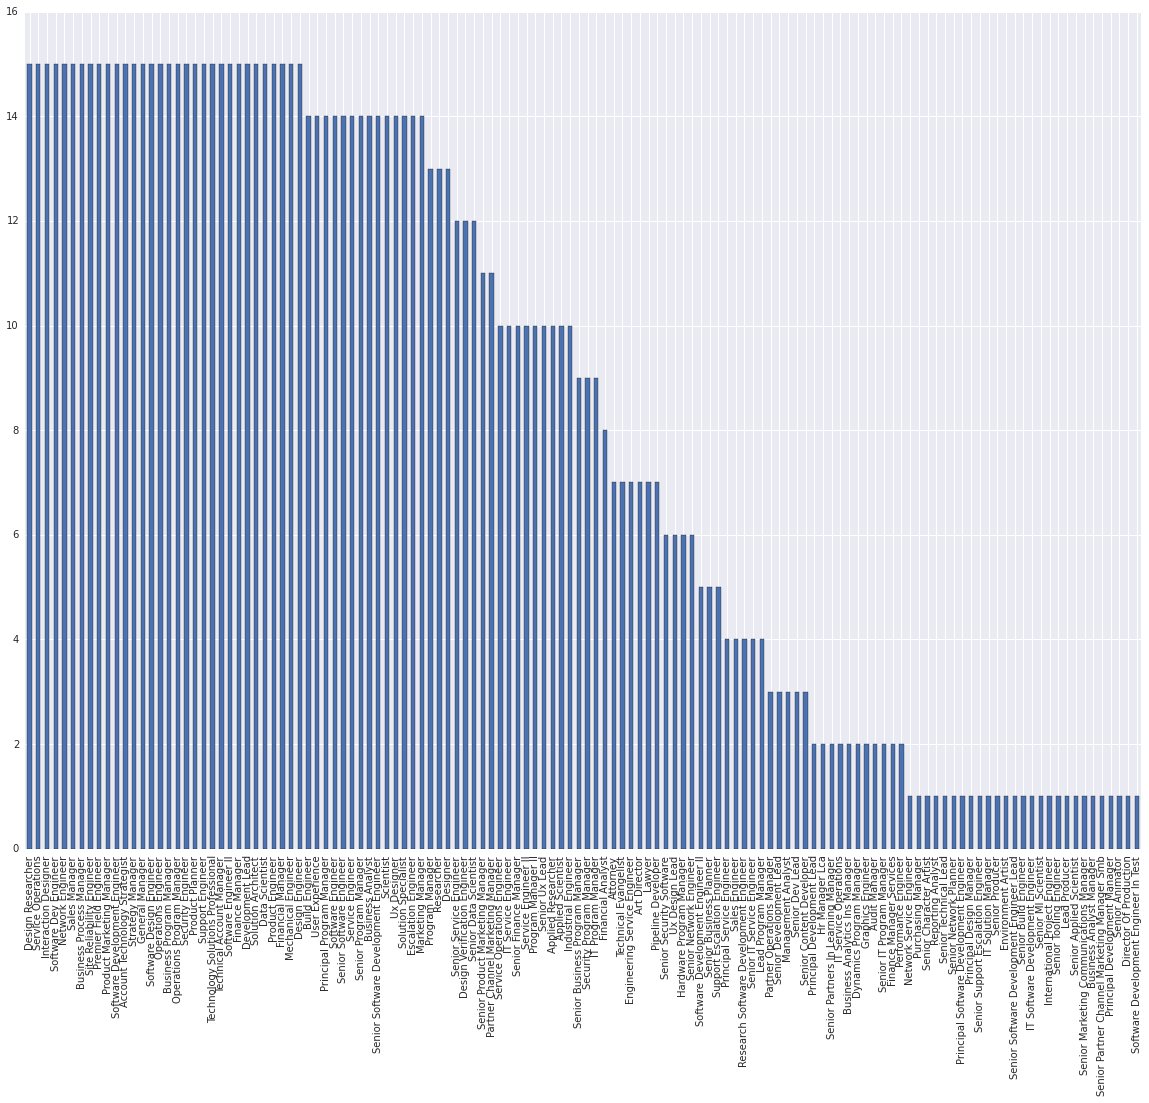

In [43]:
df_ss = df_all[['title', 'desc', 'sal']]

vc = df_ss.title.value_counts()

a = vc.plot(kind = 'bar', figsize = (20,15))

In [19]:
df_ss.head()

,title,desc,sal
0,Software Engineer,"\n It's a new day in IT. There are more apps, ...",124
1,Software Engineer,"\n In Analog, peoplenot devicesare at the cent...",124
2,Software Engineer,\n Do you want to be part of the telemetry rev...,124
3,Software Engineer,"\n In Analog, people-not devices-are at the ce...",124
4,Software Engineer,"\n In Analog, people-not devices-are at the ce...",124


In [68]:
# df_ss.index = df_ss.title.values
# df_ss = df_ss.drop('title', 1)
# df_ss.head()

In [493]:
import pandas as pd


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



In [24]:
X_train, X_test, y_train, y_test = fnc.fair_split(df_ss, 0.2)

In [25]:
X_test.shape

(209, 1)

In [26]:
df_ss = df_all[['title', 'desc', 'sal']]
df_ss.head()

,title,desc,sal
0,Software Engineer,"\n It's a new day in IT. There are more apps, ...",124
1,Software Engineer,"\n In Analog, peoplenot devicesare at the cent...",124
2,Software Engineer,\n Do you want to be part of the telemetry rev...,124
3,Software Engineer,"\n In Analog, people-not devices-are at the ce...",124
4,Software Engineer,"\n In Analog, people-not devices-are at the ce...",124


In [31]:
X_train, X_test, y_train, y_test, vect, feature_words = fnc.split_and_vectorize(df_ss, (1,4), 2000)

In [32]:
feature_words

[u'10',
 u'10 years',
 u'10 years experience',
 u'100',
 u'200',
 u'24x7x365',
 u'365',
 u'3d',
 u'3rd',
 u'3rd party',
 u'500',
 u'abilities',
 u'ability',
 u'ability build',
 u'ability communicate',
 u'ability drive',
 u'ability effectively',
 u'ability lead',
 u'ability manage',
 u'ability meet',
 u'ability meet microsoft',
 u'ability meet microsoft customer',
 u'ability work',
 u'ability work independently',
 u'able',
 u'able work',
 u'accelerate',
 u'accelerated',
 u'access',
 u'account',
 u'account managers',
 u'accountabilities',
 u'accountability',
 u'accountable',
 u'accounting',
 u'accounts',
 u'accurate',
 u'achieve',
 u'acquisition',
 u'act',
 u'action',
 u'actionable',
 u'active',
 u'active directory',
 u'actively',
 u'activities',
 u'acumen',
 u'ad',
 u'addition',
 u'additional',
 u'address',
 u'administration',
 u'adoption',
 u'ads',
 u'advance',
 u'advanced',
 u'advanced degree',
 u'advertiser',
 u'advertising',
 u'advisor',
 u'advocate',
 u'age',
 u'age disability',
 u

In [37]:
# Random Forest Regressor
reg = RandomForestRegressor(oob_score=True, compute_importances=True, n_estimators = 500, max_features=5, min_samples_leaf=5)
reg.fit(X_train.toarray(), y_train)

/Users/nawafalsabhan/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:923: DeprecationWarning: Setting compute_importances is no longer required as version 0.14. Variable importances are now computed on the fly when accessing the feature_importances_ attribute. This parameter will be removed in 0.16.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features=5,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=5,
           min_samples_split=2, n_estimators=500, n_jobs=1, oob_score=True,
           random_state=None, verbose=0)

In [38]:
reg.oob_score_

0.082379746287905453

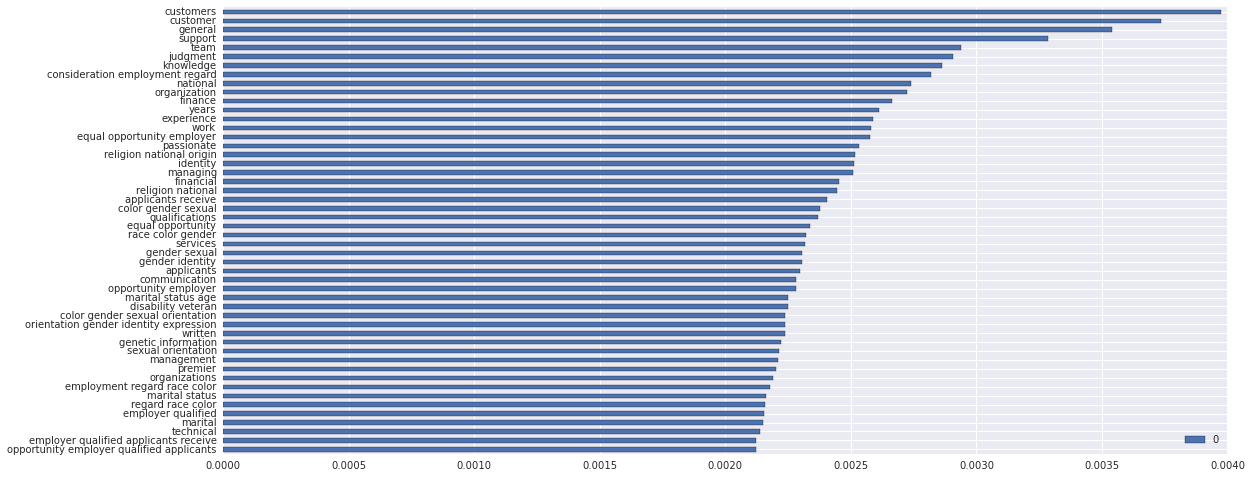

In [44]:
pd.DataFrame(reg.feature_importances_, index = feature_words).sort([0], ascending = True).iloc[-50:].plot(kind='barh',figsize=[18,8])

/Users/nawafalsabhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


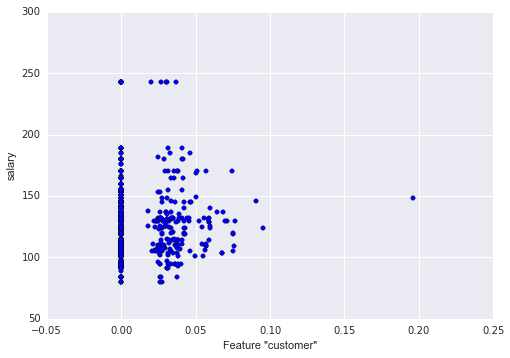

In [45]:
plt.scatter(X_train.toarray()[:,feature_words == 'customer'], y_train)
plt.xlabel('Feature "customer" ')
plt.ylabel('salary')

In [259]:
# def NMF_pool(n):
#     print 'start'
#     nmf_model = NMF(n_components=n)
#     nmf_model.fit(X_train)
    
#     H = nmf_model.components_;
#     W = nmf_model.fit_transform(X_train)
    
#     return np.linalg.norm(X_train - (W.dot(H)))

In [47]:
H, W, W_test = fnc.NMF_train(X_train, X_test, 100)

   ## To select K, plotting the normalized matrix norm of (M - W*H) Vs. K

10
20
30
40
50
60
70
80
90


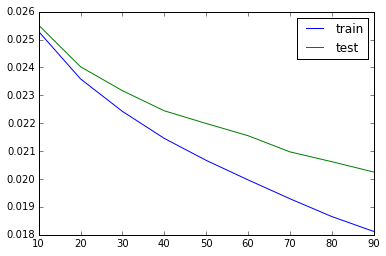

In [553]:
trn, tst = fnc.Kplot(10,100,10)
plt.plot(range(10,100,10), trn)
plt.plot(range(10,100,10), tst)
plt.legend(['train', 'test'])

10
20
30
40
50
60
70
80
90
100
110
120
130
140


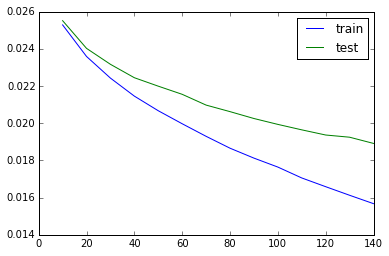

In [554]:
trn, tst = Kplot(10,150,10)
plt.plot(range(10,150,10), trn)
plt.plot(range(10,150,10), tst)
plt.legend(['train', 'test'])

In [266]:
model_2 = Ridge(alpha = 1)
model_2.fit(W, y_train)
y_pred = model_2.predict(W_test)
print 'R^2: ', model_2.score(W_test, y_test, sample_weight=None)
print 'MSE: ', mean_squared_error(y_test.values, y_pred)

R^2:  -0.0446585091754
MSE:  376.643859104


In [268]:
model_2.coef_

array([  2.05977502,   4.40055865, -22.78399502, -51.78771384,
       -37.21359565, -12.92083542, -86.1525982 ,  -4.81807048,
         3.81274063,  29.32873439,  12.65212911, -25.69129694,
        -6.81524423,  40.01360179,  -1.39942446])

In [246]:
def describe_nmf_results(W, H, n_top_words = 15):
    for topic_num, topic in enumerate(H):
        print("Topic %d:" % topic_num)
        print(" ".join([feature_words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [275]:
for topic_num, topic in enumerate(H):
    print("Topic %d:" % topic_num)
    print(" ".join([feature_words[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0:
business microsoft program employees software services experience customers management end
Topic 1:
machine learning predictive models algorithms massive filtering breakthrough analytical scale
Topic 2:
design user interaction ux visual designer motion research experiences product
Topic 3:
finance financial business reporting accounting analysis ability cost operations management
Topic 4:
service dynamics doc 24x7x365 operational server operations sql restoration monitoring
Topic 5:
marketing product business market partner strategy drive content oem channel
Topic 6:
support customer premier tam technical microsoft customers services account delivery
Topic 7:
mechanical test electronics devices design assemblies experience surface manufacturing hardware
Topic 8:
machine processing computer learning ll human surface vision hololens wdg
Topic 9:
security privacy microsoft experience requirements compliance cloud program secure check
Topic 10:
data statistical mining learning ana

In [276]:
model_2.coef_

array([  2.05977502,   4.40055865, -22.78399502, -51.78771384,
       -37.21359565, -12.92083542, -86.1525982 ,  -4.81807048,
         3.81274063,  29.32873439,  12.65212911, -25.69129694,
        -6.81524423,  40.01360179,  -1.39942446])

In [279]:
model_2.intercept_

129.24049531318897

## Plotting predicted salaries Vs. true salries  

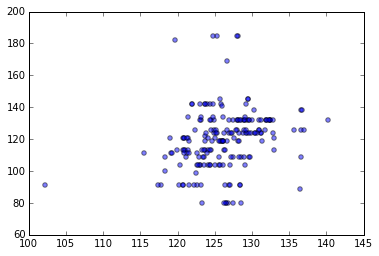

In [305]:
plt.scatter(y_pred, y_test.values, alpha = 0.5)
#plt.axhline(model_2.intercept_, color='g', linestyle='--')


## Plotting predicted salaries Vs. residuals 

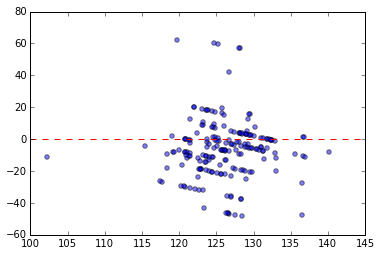

In [297]:
plt.scatter(y_pred, (y_test.values - y_pred),  alpha = 0.5)
plt.axhline(0, color='r', linestyle='--')

## Plotting predicted salaries Vs. normalized residuals

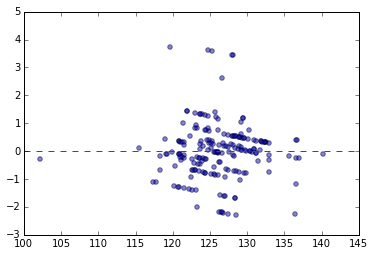

In [304]:
resid = y_test.values - y_pred
plt.scatter(y_pred, ( resid - np.mean(resid))/np.std(resid),  alpha = 0.5)
plt.axhline(0, color='r', linestyle='--')

# Latent Features Ordered by their corrolation with salary

In [821]:
from scipy.stats.stats import pearsonr
pears_list = []
for topic in W.T:
    pears_list.append(list(pearsonr(topic, y_train)))

pears_list = pd.DataFrame(pears_list)

pears_list[0][82]

high = pears_list[0].argsort()[::-10]
low = pears_list[0].argsort()[0:10]

In [884]:

for h in high:
    topic = H[h]
    s_avg = W[:,h].dot(y_train)/W[:,h].sum()
    print("Topic {0}, correlation {1}, Avg salary {2}:".format(h, pears_list[0][h], s_avg))
    print(" ".join([feature_words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print 
print '----'* 10
for l in low:
    topic = H[l]
    s_avg = W[:,l].dot(y_train)/W[:,l].sum()
    print("Topic {0}, correlation {1}, Avg salary {2}:".format(l, pears_list[0][l], s_avg))
    print(" ".join([feature_words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print 

Topic 22, correlation 0.177864204319, Avg salary 164.48523088:
patent licensing deployed microsoft technologies analyzing portfolio acquisition used industry

Topic 29, correlation 0.0664236465855, Avg salary 137.573890476:
service operability cosmos dev management engineering service engineering strong understanding control dependencies

Topic 40, correlation 0.0409751673612, Avg salary 131.599467953:
retail privacy information security security privacy store compliance standards microsoft team technology

Topic 96, correlation 0.023173655207, Avg salary 127.865733342:
advertising search advertiser bing ads display digital revenue ad industry

Topic 80, correlation 0.0163313308368, Avg salary 126.127977711:
software experience hardware manufacturing development basic net developing software development electrical

Topic 67, correlation 0.0070117925283, Avg salary 125.017224988:
licensing operations channel launch partner business customer partner partners excellence microsoft customer

In [402]:
gbr = GradientBoostingRegressor(learning_rate=0.4, n_estimators=1000, max_depth=5)

In [403]:
gbr.fit(W, y_train)
y_pred = gbr.predict(W_test)
print 'R^2: ', model_2.score(W_test, y_test, sample_weight=None)
print 'MSE: ', mean_squared_error(y_test.values, y_pred)

R^2:  -0.0446585091754
MSE:  558.349517947


In [420]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


# Fit regression model
clf_1 = DecisionTreeRegressor(max_depth=10)

clf_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=200)

clf_1.fit(W, y_train)
clf_2.fit(W, y_train)

# Predict
y_pred1 = clf_1.predict(W_test)
y_pred2 = clf_2.predict(W_test)


In [421]:
print 'R^2: ', clf_1.score(W_test, y_test, sample_weight=None)
print 'MSE: ', mean_squared_error(y_test.values, y_pred1)

print 'R^2: ', clf_2.score(W_test, y_test, sample_weight=None)
print 'MSE: ', mean_squared_error(y_test.values, y_pred2)

R^2:  -1.90432796671
MSE:  1047.13385655
R^2:  -0.191058574062
MSE:  429.427314106


In [431]:
ks = []
mses = []
for i in xrange(2,60):
    if i%10 == 0:
        print i
    H, W, W_test = NMF_train(X_train, X_test, i)
    model_2 = Ridge(alpha = 1)
    model_2.fit(W, y_train)
    y_pred = model_2.predict(W_test)
    mse = mean_squared_error(y_test.values, y_pred)
    print 'k = '+str(i)+', R^2: ', model_2.score(W_test, y_test, sample_weight=None)
    print 'k = '+str(i)+', MSE: ', mse
    ks.append(i)
    mses.append(mse)
    

k = 2, R^2:  -0.024580013754
k = 2, MSE:  369.404706851
k = 3, R^2:  -0.047681934602
k = 3, MSE:  377.733932664
k = 4, R^2:  -0.0477183433438
k = 4, MSE:  377.747059565
k = 5, R^2:  -0.0589923291315
k = 5, MSE:  381.811811326
k = 6, R^2:  -0.0468057358659
k = 6, MSE:  377.418025724
k = 7, R^2:  -0.0196412264244
k = 7, MSE:  367.624063796
k = 8, R^2:  0.00441112949331
k = 8, MSE:  358.952165684
k = 9, R^2:  -0.0309610096174
k = 9, MSE:  371.705327471
10
k = 10, R^2:  0.0010805993329
k = 10, MSE:  360.152963573
k = 11, R^2:  -0.0517247188296
k = 11, MSE:  379.191528462
k = 12, R^2:  -0.0511951785313
k = 12, MSE:  379.000606644
k = 13, R^2:  -0.0472962453575
k = 13, MSE:  377.594875274
k = 14, R^2:  -0.0455229780117
k = 14, MSE:  376.955536916
k = 15, R^2:  -0.0446585091754
k = 15, MSE:  376.643859104
k = 16, R^2:  -0.0473499571886
k = 16, MSE:  377.614240676
k = 17, R^2:  -0.010662209252
k = 17, MSE:  364.386745908
k = 18, R^2:  -0.0150254369205
k = 18, MSE:  365.959875206
k = 19, R^2:  

## Plotting number of latent features (K) Vs. MSE for test set

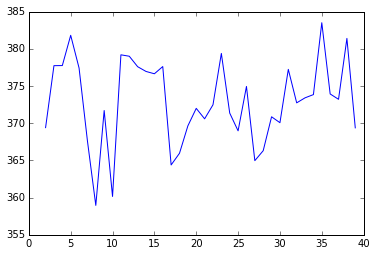

In [430]:
a = plt.plot(ks, mses)

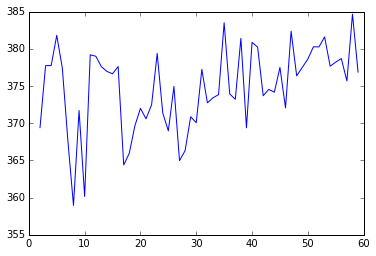

In [432]:
a = plt.plot(ks, mses)

In [448]:

alphas = np.linspace(0.1,8,60)
H, W, W_test = NMF_train(X_train, X_test, 15)
mses_alpha = []
for i in alphas:
    
    model_2 = Ridge(alpha = i)
    model_2.fit(W, y_train)
    y_pred = model_2.predict(W_test)
    mse = mean_squared_error(y_test.values, y_pred)
    print 'k = '+str(i)+', R^2: ', model_2.score(W_test, y_test, sample_weight=None)
    print 'k = '+str(i)+', MSE: ', mse
    mses_alpha.append(mse)

k = 0.1, R^2:  -0.09668357744
k = 0.1, MSE:  395.401110693
k = 0.233898305085, R^2:  -0.0778260277091
k = 0.233898305085, MSE:  388.602161332
k = 0.367796610169, R^2:  -0.066825148875
k = 0.367796610169, MSE:  384.635876253
k = 0.501694915254, R^2:  -0.0593420094195
k = 0.501694915254, MSE:  381.937885954
k = 0.635593220339, R^2:  -0.0538773728887
k = 0.635593220339, MSE:  379.967651879
k = 0.769491525424, R^2:  -0.0497352510324
k = 0.769491525424, MSE:  378.474240638
k = 0.903389830508, R^2:  -0.0465292912157
k = 0.903389830508, MSE:  377.31835566
k = 1.03728813559, R^2:  -0.0440189189292
k = 1.03728813559, MSE:  376.413259596
k = 1.17118644068, R^2:  -0.0420423899648
k = 1.17118644068, MSE:  375.700636772
k = 1.30508474576, R^2:  -0.0404850288143
k = 1.30508474576, MSE:  375.139141787
k = 1.43898305085, R^2:  -0.0392623732564
k = 1.43898305085, MSE:  374.698322415
k = 1.57288135593, R^2:  -0.0383104276953
k = 1.57288135593, MSE:  374.35510552
k = 1.70677966102, R^2:  -0.0375796389889

In [453]:
ks = []
mses = []
for i in xrange(2,80):
    if i%10 == 0:
        print i
    H, W, W_test = NMF_train(X_train, X_test, i)
    model_2 = Ridge(alpha = 2.5)
    model_2.fit(W, y_train)
    y_pred = model_2.predict(W_test)
    mse = mean_squared_error(y_test.values, y_pred)
    print 'k = '+str(i)+', R^2: ', model_2.score(W_test, y_test, sample_weight=None)
    print 'k = '+str(i)+', MSE: ', mse
    ks.append(i)
    mses.append(mse)

k = 2, R^2:  -0.0277315746458
k = 2, MSE:  370.5409787
k = 3, R^2:  -0.0443856791127
k = 3, MSE:  376.545492253
k = 4, R^2:  -0.0446924211247
k = 4, MSE:  376.656085805
k = 5, R^2:  -0.0571723823728
k = 5, MSE:  381.155643052
k = 6, R^2:  -0.0467334080433
k = 6, MSE:  377.391948465
k = 7, R^2:  -0.0225487667171
k = 7, MSE:  368.672355833
k = 8, R^2:  -0.00741825377792
k = 8, MSE:  363.217161878
k = 9, R^2:  -0.0336866008188
k = 9, MSE:  372.688019115
10
k = 10, R^2:  -0.00721947868785
k = 10, MSE:  363.145494997
k = 11, R^2:  -0.0470580972256
k = 11, MSE:  377.509012736
k = 12, R^2:  -0.0424911264171
k = 12, MSE:  375.862425364
k = 13, R^2:  -0.0409896607907
k = 13, MSE:  375.321083094
k = 14, R^2:  -0.0385556175325
k = 14, MSE:  374.443506893
k = 15, R^2:  -0.0361099132505
k = 15, MSE:  373.561726397
k = 16, R^2:  -0.0414477913221
k = 16, MSE:  375.486258652
k = 17, R^2:  -0.0171120174392
k = 17, MSE:  366.712176299
k = 18, R^2:  -0.0253981343501
k = 18, MSE:  369.699674149
k = 19, R^

## Plotting K Vs. MSE for test set

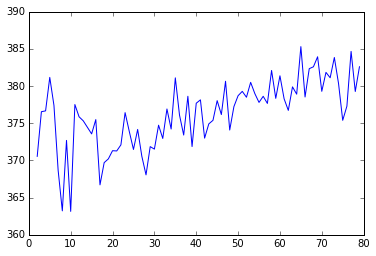

In [454]:
a = plt.plot(ks, mses)

#### As K increases the model is overfitting...

## Increasing the regularization parameter alpha in Ridge regression

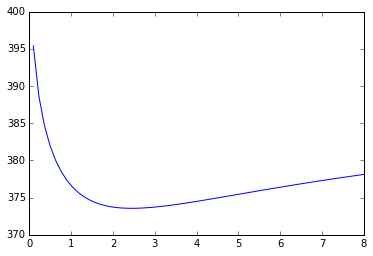

In [450]:
plt.plot(alphas, mses_alpha)

In [451]:
min(mses_alpha)

373.56245358993419

# Ngrams

In [698]:
def randforest(W, W_test, y_train, depth, n_estm, sample_size):
    
    clf_1 = RandomForestRegressor(n_estimators = n_estm, max_depth=depth, min_samples_split = sample_size)

    clf_1.fit(W.toarray(), y_train)

    y_pred1 = clf_1.predict(W_test.toarray())
    y_train_pred = clf_1.predict(W.toarray())
   
    mse_test = mean_squared_error(y_test, y_pred1)
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    return mse_test , mse_train

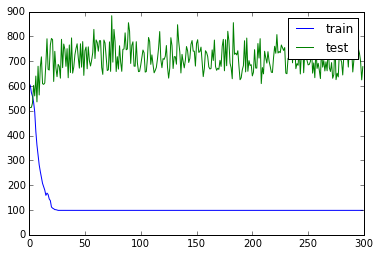

In [486]:
trn, = plt.plot(depths, mses_train)
tst, =plt.plot(depths, mses_test)
plt.legend([trn, tst], ['train', 'test'])

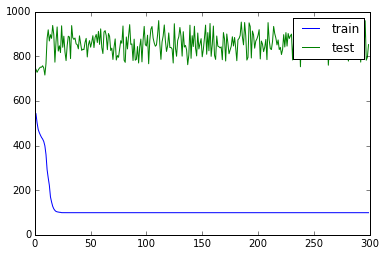

In [488]:
trn, = plt.plot(depths, mses_train)
tst, =plt.plot(depths, mses_test)
plt.legend([trn, tst], ['train', 'test'])

## Plotting test and train MSE's for unigram, (unigram + bigram) and (unigram + bigram + trigram)

In [504]:
depths = xrange(50,800,50)
mses_test1 = []
mses_train1 = []

X_train, X_test, y_train, y_test, vect, feature_words = split_and_vectorize(df_ss, (1,1), 5000)
H, W, W_test = NMF_train(X_train, X_test, 15)
for d in depths:
    mse_test, mse_train = randforest(W, W_test, y_train, None, d)
    mses_test1.append(mse_test)
    mses_train1.append(mse_train)

In [505]:
depths = xrange(50,800,50)
mses_test2 = []
mses_train2 = []

X_train, X_test, y_train, y_test, vect, feature_words = split_and_vectorize(df_ss, (1,2), 5000)
H, W, W_test = NMF_train(X_train, X_test, 15)
for d in depths:
    mse_test, mse_train = randforest(W, W_test, y_train, None, d)
    mses_test2.append(mse_test)
    mses_train2.append(mse_train)

In [506]:
depths = xrange(50,800,50)
mses_test3 = []
mses_train3 = []

X_train, X_test, y_train, y_test, vect, feature_words = split_and_vectorize(df_ss, (1,3), 5000)
H, W, W_test = NMF_train(X_train, X_test, 15)
for d in depths:
    mse_test, mse_train = randforest(W, W_test, y_train, None, d)
    mses_test3.append(mse_test)
    mses_train3.append(mse_train)

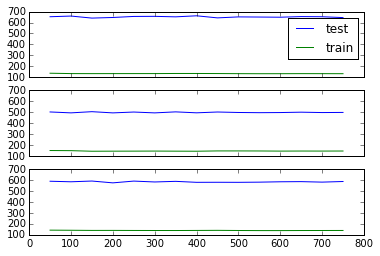

In [508]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey = True)
ax1.plot(depths, mses_test1)
ax1.plot(depths, mses_train1)
ax1.legend(['test', 'train'])
ax2.plot(depths, mses_test2)
ax2.plot(depths, mses_train2)
ax3.plot(depths, mses_test3)
ax3.plot(depths, mses_train3)

## Creating quantile cuts for salary to use chi2 to select features

In [51]:
df_ss2 = df_ss.copy()
df_ss2['slabel'] = pd.qcut(df_ss2.sal, 6)

In [58]:
X_train_new_a, X_train_new_b, X_test_new_a, X_test_new_b, y_train, y_test, vect_model, feature_words = fnc.split_vectorize_featSelection(df_ss2, (1,3))

## Plotting MSE against the number of trees in a randomforest

In [694]:
trees = xrange(100,600,50)
mses_test = []
mses_train = []

for t in trees:
    mse_test, mse_train = fnc.randforest(X_train_new_a, X_test_new_a, y_train, None, t)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

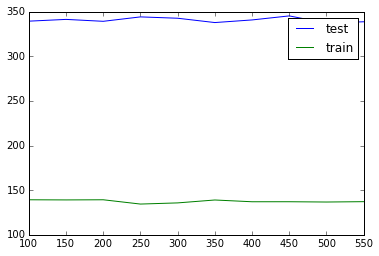

In [695]:
plt.plot(trees, mses_test)
plt.plot(trees, mses_train)
plt.legend(['test', 'train'])

## Plotting MSE against the number of minimum sample split 

In [703]:
sample_size = xrange(2,60,2)
mses_test = []
mses_train = []

for minsamp in sample_size:
    mse_test, mse_train = randforest(X_train_new_a, X_test_new_a, y_train, None, 100, minsamp)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

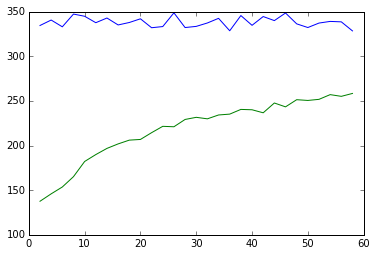

In [704]:
plt.plot(sample_size, mses_test)
plt.plot(sample_size, mses_train)
#plt.legend(['test', 'train'])

#### Model is overfitting 
#### More data might improve the model given the right model complexity

# bigger Dataset

In [61]:
coll = fnc.init_db('jobs', 'MSq3_salaries')

In [63]:
data_MS3 = coll.find()

df_MS3 = pd.DataFrame(list(data_MS3))
print df_MS3.info()
df_MS3['sal'] = df_MS3['sal'].map(lambda x: x.replace('$', '').replace('k', '')).astype(int)

df_MS3['date'] = df_MS3['other'].map(lambda x: fnc.get_date(x))

df_MS3['state'] = df_MS3['other'].map(lambda x: fnc.get_state(x))

df_MS3['city'] = df_MS3['other'].map(lambda x: fnc.get_city(x))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3754 entries, 0 to 3753
Data columns (total 8 columns):
_id        3754 non-null object
company    3754 non-null object
desc       3754 non-null object
html       3754 non-null object
other      3754 non-null object
sal        3754 non-null object
title      3754 non-null object
url        3754 non-null object
dtypes: object(8)
memory usage: 264.0+ KB
None


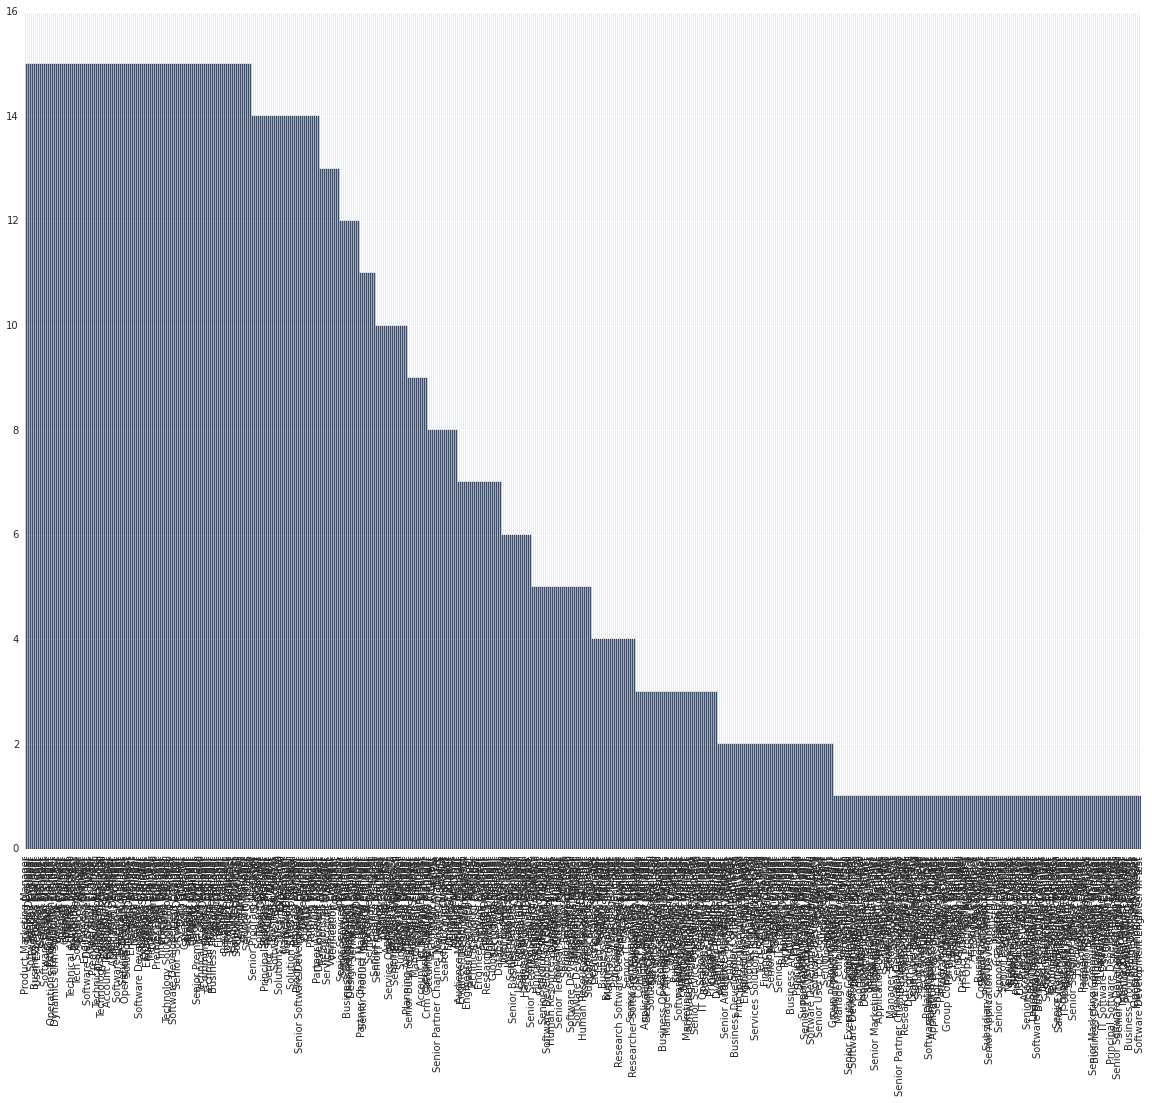

In [64]:
df_ms3 = df_MS3[['title', 'desc', 'sal']]

df_ms3.head()

vc = df_ms3.title.value_counts()

a = vc.plot(kind = 'bar', figsize = (20,15))

In [65]:
df_ms3L = df_ms3.copy()
df_ms3L['slabel'] = pd.qcut(df_ms3L.sal, 6)
df_ms3L.head()

,title,desc,sal,slabel
0,Software Engineer,\n Are you looking for opportunities to delive...,124,"(113, 124]"
1,Software Engineer,\n We are looking for a full-stack Senior Soft...,124,"(113, 124]"
2,Software Engineer,\n Are you excited about working on the bleedi...,124,"(113, 124]"
3,Software Engineer,"\n It's a new day in IT. There are more apps, ...",124,"(113, 124]"
4,Software Engineer,"\n In Analog, peoplenot devicesare at the cent...",124,"(113, 124]"


In [66]:
X_train_new_a, X_train_new_b, X_test_new_a, X_test_new_b, y_train, y_test, vect_model, feature_words = fnc.split_vectorize_featSelection(df_ms3L, (1,3))

In [735]:
trees = xrange(100,300,50)
mses_test = []
mses_train = []
# docs_train, docs_test, y_train, y_test = train_test_split(df_ss['desc'], df_ss['sal'], test_size = 0.2)
# vect_mode = TfidfVectorizer(stop_words='english', strip_accents = 'unicode', ngram_range = (1,1), max_features=1000)    
# X_train = vect_model.fit_transform(docs_train)
# X_test = vect_model.transform(docs_test)
for t in trees:
    print t
    mse_test, mse_train = randforest(X_train_new_a, X_test_new_a, y_train, None, t, 2)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

100
150
200
250


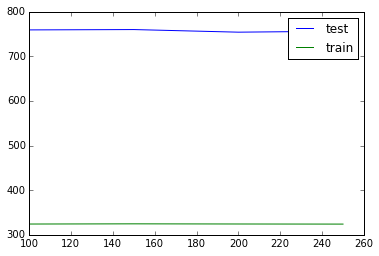

In [737]:
plt.plot(trees, mses_test)
plt.plot(trees, mses_train)
plt.legend(['test', 'train'])

In [739]:
sample_size = xrange(2,60,2)
mses_test = []
mses_train = []
# docs_train, docs_test, y_train, y_test = train_test_split(df_ss['desc'], df_ss['sal'], test_size = 0.2)
# vect_mode = TfidfVectorizer(stop_words='english', strip_accents = 'unicode', ngram_range = (1,1), max_features=1000)    
# X_train = vect_model.fit_transform(docs_train)
# X_test = vect_model.transform(docs_test)
for minsamp in sample_size:
    print minsamp
    mse_test, mse_train = randforest(X_train_new_a, X_test_new_a, y_train, None, 100, minsamp)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58


## Plotting MSE against the number of minimum sample split 

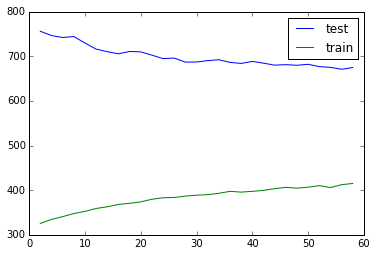

In [740]:
plt.plot(sample_size, mses_test)
plt.plot(sample_size, mses_train)
plt.legend(['test', 'train'])

## Salary histograms for both datasets

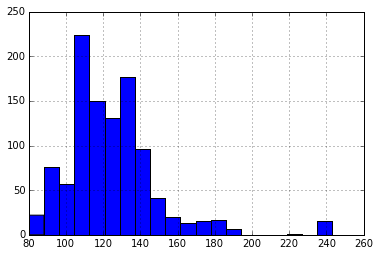

In [743]:
df_ss.sal.hist(bins = 20)

In [744]:
df_ss.sal.var()

621.2900737528189

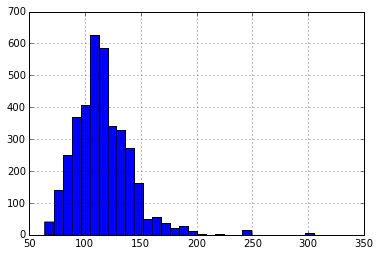

In [886]:
df_ms3L.sal.hist(bins = 30)

In [887]:
from scipy.stats.stats import pearsonr
pears_list2 = []
for topic in W.T:
    pears_list2.append(list(pearsonr(topic, y_train)))

pears_list2 = pd.DataFrame(pears_list2)


high2 = pears_list2[0].argsort()[::-10]
low2 = pears_list2[0].argsort()[0:10]

In [890]:
H2, W2, W_test2 = NMF_train(X_train_new_a, X_test_new_a, 100)

In [891]:

for h in high2:
    topic = H2[h]
    s_avg = W2[:,h].dot(y_train)/W2[:,h].sum()
    print("Topic {0}, correlation {1}, Avg salary {2}:".format(h, pears_list[0][h], s_avg))
    print(" ".join([feature_words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print 
print '----'* 100
for l in low2:
    topic = H2[l]
    s_avg = W2[:,l].dot(y_train)/W2[:,l].sum()
    print("Topic {0}, correlation {1}, Avg salary {2}:".format(l, pears_list[0][l], s_avg))
    print(" ".join([feature_words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print 

Topic 22, correlation 0.177864204319, Avg salary 112.55803973:
1000 lines 2007 2010 preferred 000 business trips 10 years corporate 10 search 2012 installation configuration 10 client sites 2012 entire center 2008 2012 ability 15

Topic 29, correlation 0.0664236465855, Avg salary 109.434654137:
100 company position 100 brilliant scientists 000 business trips 100 countries 10 solutions 2012 entire center 100 accounts large 2010 2013 2007 2010 12 education customers

Topic 40, correlation 0.0409751673612, Avg salary 111.707371502:
2012 installation configuration 2013 excellent interpersonal 2013 exchange 200 300 2012 environment 2012 entire center 2020 iot team 110k 100 countries 000 headcount 12 2003 active directory

Topic 96, correlation 0.023173655207, Avg salary 122.890964425:
100 mission critical 10 microsoft services 10 mobile 100 datacenters running 10 years experience 20 quarter quarters 10 key expertise 2015 20b 1994 launch cloud

Topic 80, correlation 0.0163313308368, Avg sala

In [904]:
X_train3, X_test3, y_train3, y_test3, vect3, feature_words3 = split_and_vectorize(df_ms3L, (1,3), 2000)

In [905]:
reg = RandomForestRegressor(oob_score=True, compute_importances=True, n_estimators = 500, max_features=5, min_samples_leaf=5)
reg.fit(X_train3.toarray(), y_train3)

/Users/nawafalsabhan/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:923: DeprecationWarning: Setting compute_importances is no longer required as version 0.14. Variable importances are now computed on the fly when accessing the feature_importances_ attribute. This parameter will be removed in 0.16.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features=5,
           max_leaf_nodes=None, min_density=None, min_samples_leaf=5,
           min_samples_split=2, n_estimators=500, n_jobs=1, oob_score=True,
           random_state=None, verbose=0)

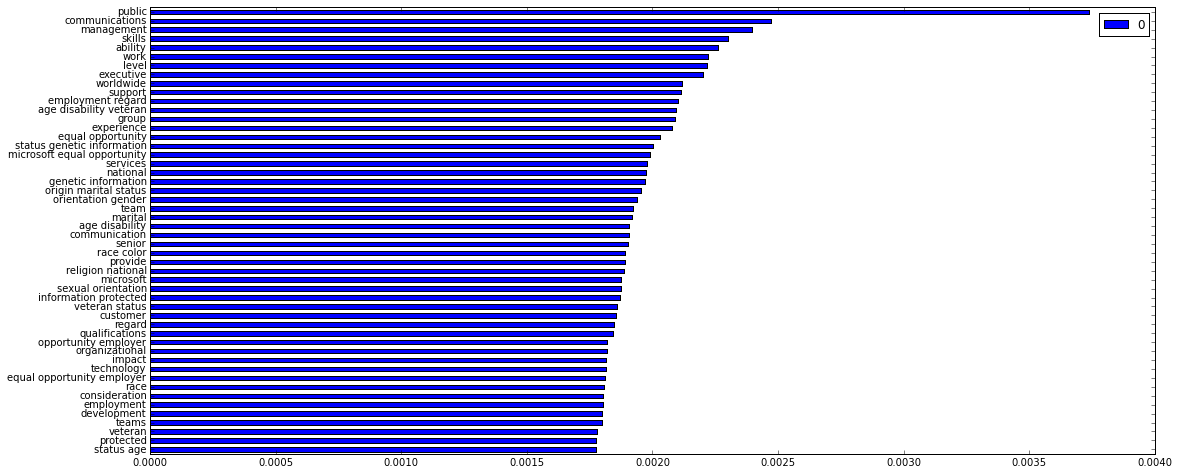

In [907]:
pd.DataFrame(reg.feature_importances_, index = feature_words3).sort([0], ascending = True).iloc[-50:].plot(kind='barh',figsize=[18,8])

In [915]:
len(df_ms3L.desc.unique())/float(df_ms3L.shape[0])

0.38678742674480554

In [916]:
len(df_ss.desc.unique())/float(df_ss.shape[0])

0.6660395108184384